In [3]:
import pandas as pd
import numpy as np
import math

In [6]:
# before inserting the data, sort the data according to country name from A to Z. 

ranking = pd.read_csv(r"C:\...\DataAndResults_2018.csv")

ranking['year']=ranking['year'].astype(str)
ranking['year'].dtype

ranking

,cntry,year,Country,EE,HE,GNI,ME,Edu_gm,frontier,HDI_score,HDI_rank,log_GNI,proposedHDI_score,proposedHDI_frontier_rank,proposedHDI_rank
0,AF,2018,Afghanistan,10.1,64.5,1746,3.9,6.276145,4,0.496,169,7.465083,76.972458,4,169
1,AL,2018,Albania,15.2,78.5,12300,10.1,12.390319,15,0.791,69,9.417355,101.266243,10,70
2,DZ,2018,Algeria,14.7,76.7,13639,8.0,10.844353,13,0.759,82,9.520689,98.966469,8,80
3,AD,2018,Andorra,13.3,81.8,48641,10.2,11.647317,20,0.857,36,10.792222,108.841164,7,32
4,AO,2018,Angola,11.8,60.8,5555,5.1,7.757577,6,0.574,148,8.622454,82.780876,5,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,VE,2018,Venezuela (Bolivarian Republic of),12.8,72.1,9070,10.3,11.482160,11,0.726,95,9.112727,95.452881,9,101
184,VN,2018,Viet Nam,12.7,75.3,6220,8.2,10.204901,10,0.693,117,8.735525,93.552803,3,115
185,YE,2018,Yemen,8.7,66.1,1433,3.2,5.276362,5,0.463,176,7.267525,75.527176,10,173
186,ZM,2018,Zambia,12.1,63.5,3582,7.1,9.268765,6,0.591,142,8.183677,83.804306,3,147


In [8]:
#for score visualisation, we need the Pareto frontier information

def fast_non_dominated_sort(c1, c2, c3):
    S=[[] for i in range(0, len(c1))]
    front = [[]]
    n=[0 for i in range(0, len(c1))]
    rank = [0 for i in range(0, len(c1))]

    for p in range(0, len(c1)):
        #if corr1 <=0.90 and corr2 <=0.90 and corr3 <=0.90:
        S[p]=[]
        n[p]=0
        for q in range(0, len(c1)):
            if (c1[p] > c1[q] and c2[p] > c2[q] and c3[p] > c3[q]) or (c1[p] >= c1[q] and c2[p] > c2[q] and c3[p] > c3[q]) or (c1[p] > c1[q] and c2[p] >= c2[q] and c3[p] > c3[q]) or (c1[p] > c1[q] and c2[p] > c2[q] and c3[p] >= c3[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (c1[q] > c1[p] and c2[q] > c2[p] and c3[q] > c3[p]) or (c1[q] >= c1[p] and c2[q] > c2[p] and c3[q] > c3[p]) or (c1[q] > c1[p] and c2[q] >= c2[p] and c3[q] > c3[p]) or (c1[q] > c1[p] and c2[q] > c2[p] and c3[q] >= c3[p]):
                n[p] += 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front


#Function to find index of list
def index_of(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

#Function to sort by values
def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_of(min(values),values) in list1:
            sorted_list.append(index_of(min(values),values))
        values[index_of(min(values),values)] = math.inf
    return sorted_list


Education=list(ranking['Edu_gm'])
Health=list(ranking['HE'])
Income=list(ranking['GNI'])

frontiers = fast_non_dominated_sort(Education[:], Health[:], Income[:])

C:\Users\Goksu Ozturk\AppData\Local\Temp\ipykernel_18832\1689697626.py:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(sm)


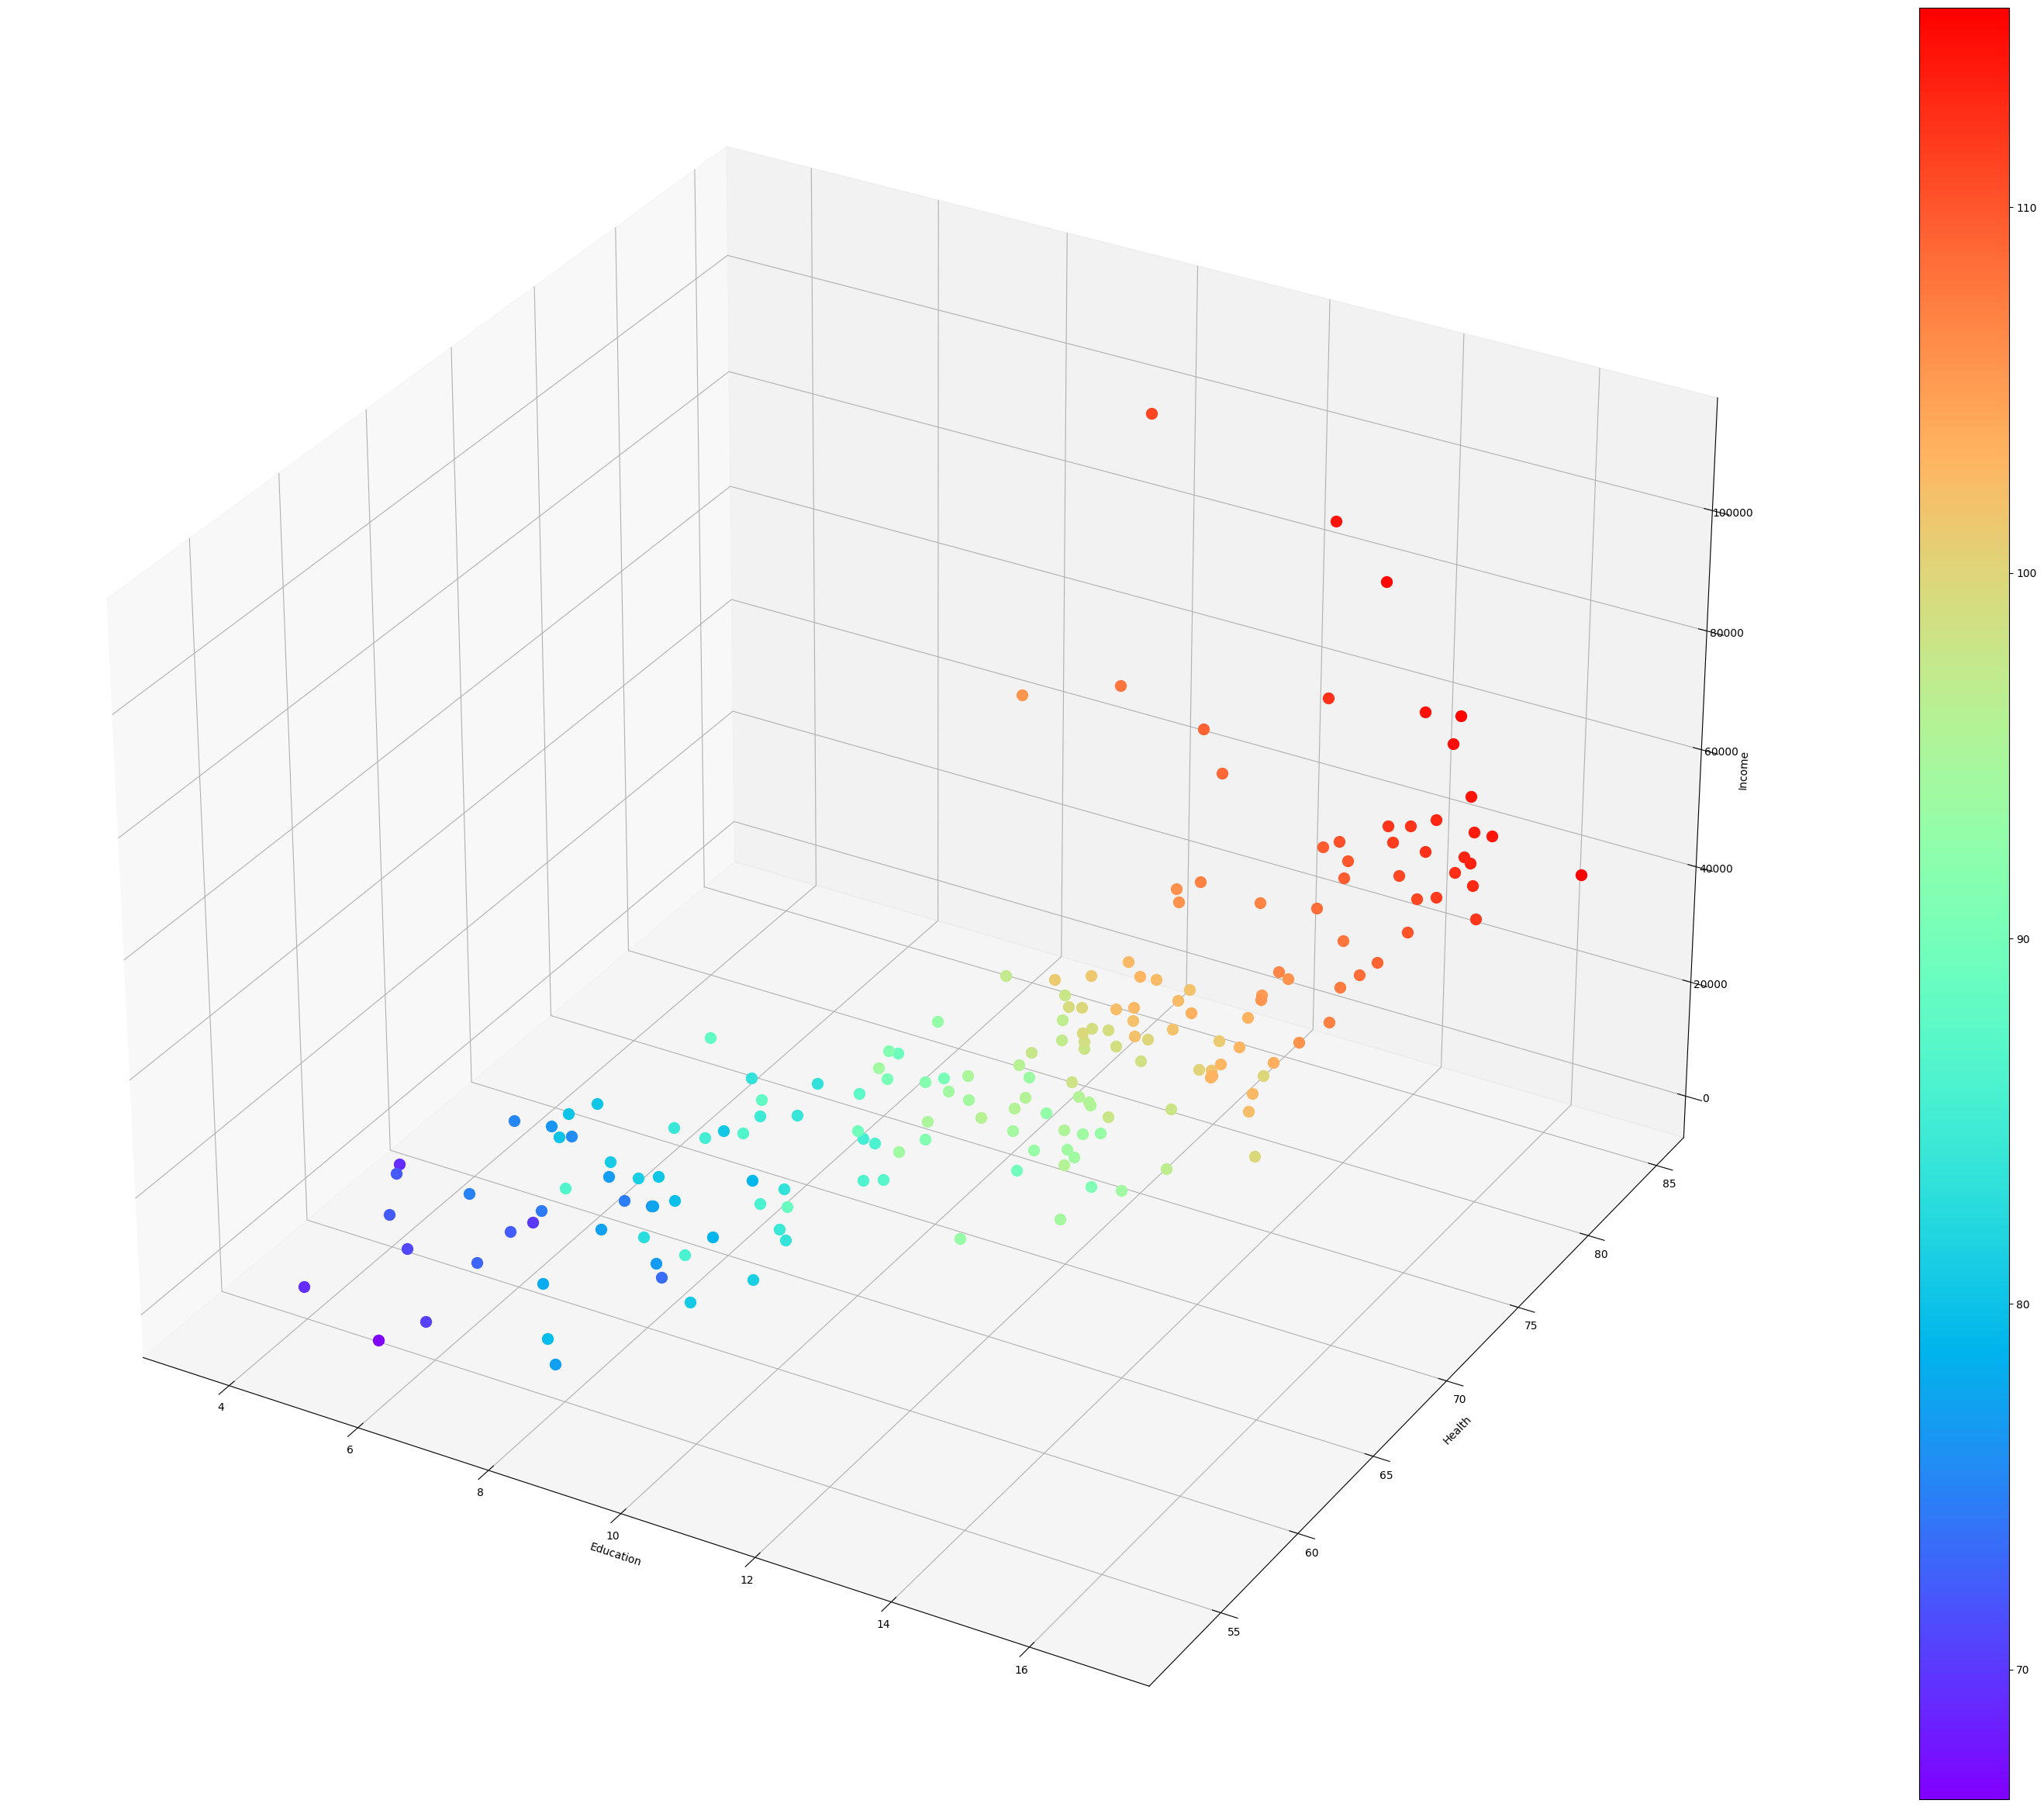

In [15]:
import matplotlib.colors
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from mpl_toolkits.mplot3d import axes3d 
import matplotlib.cm as cm

#select the column with the scores of the proposed methoc
Scores = ranking['proposedHDI_score']


#visualization
fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(111, projection='3d')

colors = cm.rainbow(np.linspace(0, 1, len(frontiers)))
#colors = ['lightgreen', 'plum', 'deeppink', 'purple', 'brown', 'pink', 'lightcoral', 'lime', 'crimson','blue', 'orange', 'green', 'gray', 'olive', 'cyan', 'yellow', 'mediumvioletred', 'red', 'darkturquoise', 'tomato', 'gold', 'teal', 'indigo', 'lightsteelblue', 'tan', 'aquamarine', 'lawngreen', 'fuchsia', 'bisque', 'seagreen']
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=min(Scores), vmax=max(Scores))

for l in range(len(frontiers)):
    for point in frontiers[l]:
        ax.scatter(Education[point], Health[point], Income[point], s=100, c=cmap([norm(Scores[point])]))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)


ax.set_xlabel('Education')
ax.set_ylabel('Health')
ax.set_zlabel('Income')

plt.show()

#Note: small warning may appear due to the use of rainbow package, however, it does not affect the output figure

In [ ]:
#for the comparision of the proposed index and the HDI, please see the .ipybn file, named Step 4. 